In [2]:
import numpy as np
import pandas as pd

# Q2.1
Table E2.1 gives the values of serum cholesterol levels for 1067 American men
aged 25–34 years.
(a) Plot the histogram, frequency polygon, and cumulative frequency graph.
(b) Find, approximately, the median using your cumulative frequency graph.

In [16]:
index = ['80–119', '120–159', '160–199', '200–239', '240–279', '280–319', '320–399', 'Total']

columns = ['Number of men']

data = [13, 150, 442, 299, 115, 34, 14, 1067]

df = pd.DataFrame(data=data, index=index, columns=columns)
df.index = df.index.rename('Cholesterol level (mg/100 mL)')

df

,Number of men
Cholesterol level (mg/100 mL),
80–119,13
120–159,150
160–199,442
200–239,299
240–279,115
280–319,34
320–399,14
Total,1067


## A2.1(a)

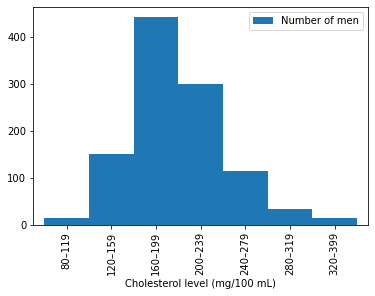

In [55]:
# Histogram
df.iloc[:-1].plot.bar(width=1);

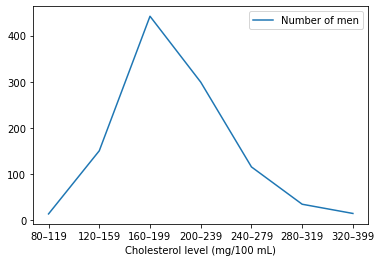

In [57]:
# Frequency polygon
df.iloc[:-1].plot.line();

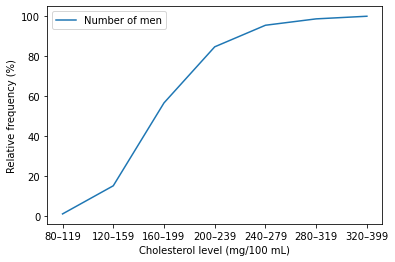

In [58]:
# Cumulative frequency graph
cum_freq.plot.line(ylabel='Relative frequency (%)');

## A2.1(b)
Median is approx. 160-199.

# Q2.5
The following are the daily fat intake (grams) of a group of 150 adult males.

In [75]:
data = np.array([
    22, 62, 77, 84, 91, 102, 117, 129, 137, 141, 42, 56, 78, 73, 96, 105, 117, 125,
    135, 143, 37, 69, 82, 93, 93, 100, 114, 124, 135, 142, 30, 77, 81, 94, 97, 102,
    119, 125, 138, 142, 46, 89, 88, 99, 95, 100, 116, 121, 131, 152, 63, 85, 81, 94,
    93, 106, 114, 127, 133, 155, 51, 80, 88, 98, 97, 106, 119, 122, 134, 151, 52, 70,
    76, 95, 107, 105, 117, 128, 144, 150, 68, 79, 82, 96, 109, 108, 117, 120, 147, 153
])

(a) Form a frequency distribution, including relative frequencies and cumulative
relative frequencies.

(b) Plot the frequency polygon and investigate the symmetry of the distribution.

(c) Plot the cumulative frequency graph and find the 25th and 75th percentiles. Also
calculate the midrange = 75th percentile – 25th percentile. (This is also called
the Inter‐quartile Range (IQR) and is another good descriptive measure of variation;
it is similar to the range but is less affected by extreme observations.)

## A2.5(a)

In [116]:
freqs = pd.cut(data, bins=10).value_counts()
df = pd.DataFrame(freqs, columns=['Frequency'])
df['Relative Frequency'] = df['Frequency'] / df['Frequency'].sum()
df['Cumulative Relative Frequency (%)'] = df['Relative Frequency'].cumsum() * 100
df.round(3)

,Frequency,Relative Frequency,Cumulative Relative Frequency (%)
"(21.867, 35.3]",2,0.022,2.222
"(35.3, 48.6]",3,0.033,5.556
"(48.6, 61.9]",3,0.033,8.889
"(61.9, 75.2]",6,0.067,15.556
"(75.2, 88.5]",14,0.156,31.111
"(88.5, 101.8]",17,0.189,50.000
"(101.8, 115.1]",11,0.122,62.222
"(115.1, 128.4]",15,0.167,78.889
"(128.4, 141.7]",9,0.100,88.889
"(141.7, 155.0]",10,0.111,100.000


## A2.5(b)

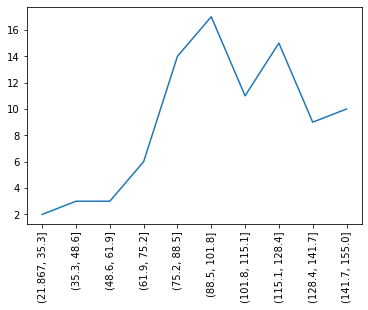

In [117]:
df['Frequency'].plot.line(rot=90, xticks=np.arange(0, len(df)));

## A2.5(c)

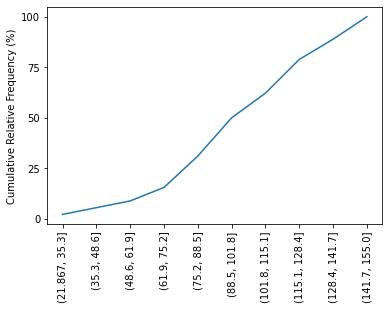

In [123]:
df['Cumulative Relative Frequency (%)'].plot.line(
    rot=90,
    xticks=np.arange(0, len(df)),
    ylabel='Cumulative Relative Frequency (%)',
    yticks=[0, 25, 50, 75, 100]
);

In [128]:
pct_25, pct_75 = np.quantile(data, [.25, .75])
print(f"25th percentile = {pct_25}")
print(f"75th percentile = {pct_75}")
print(f"IQR = {pct_75 - pct_25}")

25th percentile = 82.0
75th percentile = 124.75
IQR = 42.75


# Q2.6
Refer to the data on daily fat intake in Exercise 2.5.

(a) Calculate the mean using raw data.

(b) Calculate, approximately, the mean using the frequency table obtained in
Exercise 2.5.

## A2.6(a)

In [ ]:
data.mean().round(3)

102.033

## A2.6(b)

To approximate mean $\bar{x}$ from a frequency distribution table, we use:

$\Large\bar{x} \simeq \frac{\sum{fm}}{n}$

where $f$ denotes frequency, $m$ deontes interval midpoint, and $n$ denotes the total number of observations.

In [152]:
f = df['Frequency']
n = df['Frequency'].sum()
m = np.array([interval.mid for interval in df.index])

mean = (f*m).sum() / n

print(f"Approximated mean = {mean :.3f}")

Approximated mean = 102.685


# Q2.15
The following are the activity values (micromoles per minute per gram of
tissue) of a certain enzyme measured in the normal gastric tissue of 35 patients
with gastric carcinoma:

In [200]:
data = np.array([
    0.360, 1.189, 0.614, 0.788, 0.273, 2.464, 0.571,
    1.827, 0.537, 0.374, 0.449, 0.262, 0.448, 0.971,
    0.372, 0.898, 0.411, 0.348, 1.925, 0.550, 0.622,
    0.610, 0.319, 0.406, 0.413, 0.767, 0.385, 0.674,
    0.521, 0.603, 0.533, 0.662, 1.177, 0.307, 1.499,
])

Calculate the mean $\bar{x}$ , variance $s^2$, and standard deviation $s$.

## A2.15

In [201]:
mean = data.mean()

var = data.var(ddof=1)  # ddof=1 tells numpy to use n-1 as divisor
var_manual = ((data - mean) ** 2).sum() / (len(data) - 1)

std = data.std(ddof=1)
std_manual = np.sqrt(var_manual)

print(f"Mean = {mean :.3f}")
print(f"Variance = {var_manual :.3f} (manually calculated)")
print(f"Variance = {var :.3f} (from numpy)")
print(f"Std. dev = {std :.3f} (manually calculated)")
print(f"Std. dev = {std_manual :.3f} (from numpy)")

Mean = 0.718
Variance = 0.261 (manually calculated)
Variance = 0.261 (from numpy)
Std. dev = 0.511 (manually calculated)
Std. dev = 0.511 (from numpy)


# Q2.24
A laboratory investigator interested in the relationship between diet and the development
of tumors divided 90 rats into three groups and fed them with low‐fat, saturated‐
fat, and unsaturated‐fat diets, respectively. The rats were all the same age and
species and were in similar physical condition. An identical amount of tumor cells
was injected into a foot pad of each rat. The tumor‐free time is the time from injection
of tumor cells to the time that a tumor develops. All 30 rats in the unsaturatedfat
diet group developed tumors; tumor‐free times (in days) were:

In [203]:
data = np.array([
    112, 68, 84, 109, 153, 143, 60, 70, 98, 164, 63, 63, 77, 91, 91,
    66, 70, 77, 63, 66, 66, 94, 101, 105, 108, 112, 115, 126, 161, 178
])

Calculate the mean, geometric mean, and median.

## A2.24

In [205]:
from scipy.stats.mstats import gmean

geo_mean_manual = np.exp(np.log(data).mean())
geo_mean = gmean(data)

print(f"Mean = {data.mean() :.3f}")
print(f"Geometric mean = {geo_mean_manual :.3f} (calculated manually)")
print(f"Geometric mean = {geo_mean :.3f} (scipy)")
print(f"Median = {np.median(data)}")

Mean = 98.467
Geometric mean = 93.363 (calculated manually)
Geometric mean = 93.363 (scipy)
Median = 92.5


# Q2.27
Data are shown in Table E2.27 for two groups of patients who died of acute
myelogenous leukemia. Patients were classified into the two groups according
to the presence or absence of a morphologic characteristic of white cells.

Patients termed AG positive were identified by the presence of Auer rods and/
or significant granulature of the leukemic cells in the bone marrow at diagnosis.
For AG‐negative patients, these factors were absent. Leukemia is a cancer
characterized by an overproliferation of white blood cells; the higher the
white blood count (WBC), the more severe the disease.

(a) Calculate separately for each group (AG positive, AG negative) the mean $\bar{x}$,
variance $s^{2}$, and standard deviation $s$ for survival time.

(b) Calculate separately for each group (AG positive, AG negative) the mean,
geometric mean, and median for white blood count.

In [206]:
columns = [
    ['AG positive, N = 17', 'AG positive, N = 17', 'AG negative, N = 16', 'AG negative, N = 16'],
    ['WBC', 'Survival time (weeks)', 'WBC', 'Survival time (weeks)']
]

data = [
    [2300, 65, 4400, 56],
    [750, 156, 3000, 65],
    [4300, 100, 4000, 17],
    [2600, 134, 1500, 7],
    [6000, 16, 9000, 16],
    [10500, 108, 5300, 22],
    [10000, 121, 10000, 3],
    [17000, 4, 19000, 4],
    [5400, 39, 27000, 2],
    [7000, 143, 28000, 3],
    [9400, 56, 31000, 8],
    [32000, 26, 26000, 4],
    [35000, 22, 21000, 3],
    [100000, 1, 79000, 30],
    [100000, 1, 100000, 4],
    [52000, 5, 100000, 43],
    [100000, 65, np.nan, np.nan],
]

df = pd.DataFrame(data=data, columns=columns)

df

AG positive, N = 17                       AG negative, N = 16  \
                   WBC Survival time (weeks)                 WBC   
0                 2300                    65              4400.0   
1                  750                   156              3000.0   
2                 4300                   100              4000.0   
3                 2600                   134              1500.0   
4                 6000                    16              9000.0   
5                10500                   108              5300.0   
6                10000                   121             10000.0   
7                17000                     4             19000.0   
8                 5400                    39             27000.0   
9                 7000                   143             28000.0   
10                9400                    56             31000.0   
11               32000                    26             26000.0   
12               35000                    22             21000.0   
13              100000                     1             79000.0   
14              100000                     1            100000.0   
15               52000                     5            100000.0   
16              100000                    65                 NaN   

                          
   Survival time (weeks)  
0                   56.0  
1                   65.0  
2                   17.0  
3                    7.0  
4                   16.0  
5                   22.0  
6                    3.0  
7                    4.0  
8                    2.0  
9                    3.0  
10                   8.0  
11                   4.0  
12                   3.0  
13                  30.0  
14                   4.0  
15                  43.0  
16                   NaN

## A2.27(a)

In [234]:
pos_df = df[('AG positive, N = 17', 'Survival time (weeks)')]
neg_df = df[('AG negative, N = 16', 'Survival time (weeks)')]

res = pd.DataFrame()
res.loc['AG positive', 'Mean'] = pos_df.mean()
res.loc['AG positive', 'Variance'] = pos_df.var()
res.loc['AG positive', 'Std Dev'] = pos_df.std()
res.loc['AG negative', 'Mean'] = neg_df.mean()
res.loc['AG negative', 'Variance'] = neg_df.var()
res.loc['AG negative', 'Std Dev'] = neg_df.std()

res.round(3)

,Mean,Variance,Std Dev
AG positive,62.471,2954.265,54.353
AG negative,17.938,412.196,20.303


## A2.27(b)

In [246]:
pos_df = df[('AG positive, N = 17', 'WBC')]
neg_df = df[('AG negative, N = 16', 'WBC')].dropna()

res = pd.DataFrame()
res.loc['AG positive', 'Mean'] = pos_df.mean()
res.loc['AG positive', 'Geometric mean'] = gmean(pos_df)
res.loc['AG positive', 'Median'] = np.median(pos_df)
res.loc['AG negative', 'Mean'] = neg_df.mean()
res.loc['AG negative', 'Geometric mean'] = gmean(neg_df)
res.loc['AG negative', 'Median'] = np.median(neg_df)

res.round()

,Mean,Geometric mean,Median
AG positive,29074.0,12472.0,10000.0
AG negative,29262.0,15094.0,20000.0


# Q2.29
The following are the heights (measured to the nearest 2 cm) and weights
(measured to the nearest kilogram) of 10 men and 10 women.

(a) Draw a scatter diagram, for men and women separately, to show the
association, if any, between height and weight.

(b) Calculate Pearson’s correlation coefficient, Kendall’s tau, and Spearman’s
rho rank correlation coefficients of height and weight for men and women
separately.

In [247]:
columns = [
    ['Men', 'Men', 'Women', 'Women'],
    ['Height', 'Weight', 'Height', 'Weight']
]

data = np.array([
    [162, 168, 174, 176, 180, 180, 182, 184, 186, 186],
    [65, 65, 84, 63, 75, 76, 82, 65, 80, 81],
    [152, 156, 158, 160, 162, 162, 164, 164, 166, 166],
    [52, 50, 47, 48, 52, 55, 55, 56, 60, 60],
]).T

df = pd.DataFrame(data=data, columns=columns)

df

Men         Women       
  Height Weight Height Weight
0    162     65    152     52
1    168     65    156     50
2    174     84    158     47
3    176     63    160     48
4    180     75    162     52
5    180     76    162     55
6    182     82    164     55
7    184     65    164     56
8    186     80    166     60
9    186     81    166     60

## 2.29(a)

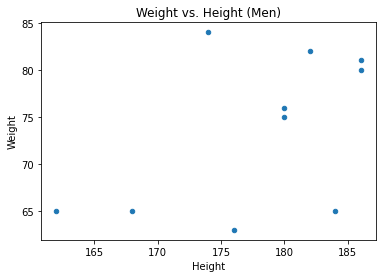

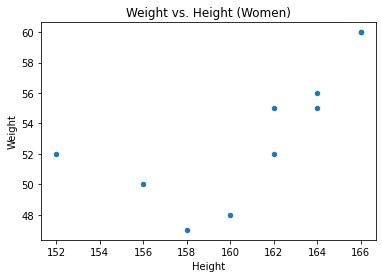

In [258]:
df['Men'].plot.scatter(x='Height', y='Weight', title='Weight vs. Height (Men)');
df['Women'].plot.scatter(x='Height', y='Weight', title='Weight vs. Height (Women)');

## 2.29(b)

In [380]:
res = pd.DataFrame()

for gender in ['Men', 'Women']:
    res.loc['Pearson (pandas)', gender] = df[gender].corr().iloc[0, 1]
    res.loc['Kendall (pandas)', gender] = df[gender].corr('kendall').iloc[0, 1]
    res.loc['Spearman (pandas)', gender] = df[gender].corr('spearman').iloc[0, 1]

res.round(3)

,Men,Women
Pearson (pandas),0.514,0.718
Kendall (pandas),0.282,0.714
Spearman (pandas),0.377,0.849


# Q2.32
In Exercise 1.46, we investigated the effects of the three binary preoperative
variables (x‐ray, grade, stage); in this exercise, we focus on the effects of the
two continuous factors (age, acid phosphatase). The 53 patients are divided
into two groups by the finding at surgery, a group with nodal involvement and
a group without (denoted by 1 or 0 in the sixth column). For each group and
for each of the two factors age at diagnosis and level of serum acid phosphatase,
calculate the mean $\bar{x}$ , variance $s^{2}$, and standard deviation $s$.

In [381]:
df = pd.read_csv('assets/nodes.txt', sep=' & ', engine='python')

print(f"df num rows: {df.shape[0]}")
df.head()

df num rows: 53


,Xray,Grade,Stage,Age,Acid,Nodes
0,0,1,1,64,40,0
1,0,0,1,63,40,0
2,1,0,0,65,46,0
3,0,1,0,67,47,0
4,0,0,0,66,48,0


## A2.32

In [424]:
index = [
    ['Age', 'Age', 'Acid', 'Acid'],
    ['Nodes=0', 'Nodes=1'] * 2,
]

columns = ['Mean', 'Variance', 'Std. Dev']

res = pd.DataFrame(index=index, columns=columns)

for group in [0, 1]:
    for factor in ['Age', 'Acid']:
        res.loc[(factor, f"Nodes={group}"), 'Mean'] = df[df['Nodes'] == group][factor].mean()
        res.loc[(factor, f"Nodes={group}"), 'Variance'] = df[df['Nodes'] == group][factor].var()
        res.loc[(factor, f"Nodes={group}"), 'Std. Dev'] = df[df['Nodes'] == group][factor].std()

res.astype(float).round(1)

Mean  Variance  Std. Dev
Age  Nodes=0  60.1      31.4       5.6
     Nodes=1  58.2      49.1       7.0
Acid Nodes=0  64.5     744.1      27.3
     Nodes=1  77.5     515.1      22.7

# Q2.33
Refer to the data on cancer of the prostate in Exercise 2.32. Investigate the
relationship between age at diagnosis and level of serum acid phosphatase by
calculating Pearson’s correlation coefficient and draw your conclusion. Repeat
this analysis, but analyze the data separately for the two groups: the group
with nodal involvement and the group without. Does the nodal involvement
seem to have any effect on the strength of this relationship?

## A2.33

In [437]:
r = df[['Age', 'Acid']].corr().iloc[0, 1]
r_no_nodes = df.query('Nodes == 0')[['Age', 'Acid']].corr().iloc[0, 1]
r_nodes = df.query('Nodes == 1')[['Age', 'Acid']].corr().iloc[0, 1]
print(f"Pearson's correlation between age and acid (all)      = {r :>6.3f}")
print(f"Pearson's correlation between age and acid (no nodes) = {r_no_nodes :>6.3f}")
print(f"Pearson's correlation between age and acid (nodes)    = {r_nodes :>6.3f}")

Pearson's correlation between age and acid (all)      =  0.054
Pearson's correlation between age and acid (no nodes) = -0.016
Pearson's correlation between age and acid (nodes)    =  0.273


Existence of nodes seems to change relationship between age and acid levels.

# Q2.34
A study was undertaken to examine the data for 44 physicians working for an
emergency department at a major hospital so as to determine which of a
number of factors are related to the number of complaints received during the
preceding year. In addition to the number of complaints, the data available
consist of the number of visits – which serves as the size for the observation
unit, the physician – and four other factors under investigation. Table E2.34
presents the complete data set. For each of the 44 physicians there are two
continuous explanatory factors: revenue (dollars per hour) and workload at the
emergency service (hours); and two binary variables: gender (female/male)
and residency training in emergency services (no/yes). Divide the number of
complaints by the number of visits and use this ratio (number of complaints
per visit) as the primary outcome or endpoint X.

(a) For each of the two binary factors, gender (female/male) and residency
training in emergency services (no/yes), which divide the 44 physicians
into two subgroups – say, men and women – calculate the mean x and
standard deviation s for the endpoint X.

(b) Investigate the relationship between the outcome, number of complaints
per visit, and each of two continuous explanatory factors, revenue (dollars
per hour) and workload at the emergency service (hours), by calculating
Pearson’s correlation coefficient, and draw your conclusion.

(c) Draw a scatter diagram to show the association, if any, between the
number of complaints per visit and the workload at the emergency service.
Does it appear to be linear?

In [481]:
df = pd.read_csv('assets/physician_complaints.txt', sep=' & ', engine='python')
df['Complaints/1000 visits'] = df['Complaint'] / df['NVisits'] * 1000

print(f"df num rows: {df.shape[0]}")
df.head()

df num rows: 44


,NVisits,Complaint,Residency,Gender,Revenue,Hours,Complaints/1000 visits
0,2014,2,Y,F,263.03,1287.25,0.993049
1,3091,3,N,M,334.94,1588.00,0.970560
2,879,1,Y,M,206.42,705.25,1.137656
3,1780,1,N,M,226.32,1005.50,0.561798
4,3646,11,N,M,288.91,1667.25,3.017005


## A3.34(a)

In [482]:
columns = [
    ['Complaints/1000 visits', 'Complaints/1000 visits'],
    ['Mean', 'Std. Dev']
]

index = ['Gender="F"', 'Gender="M"', 'Residency="N"', 'Residency="Y"']

res = pd.DataFrame(index=index, columns=columns)

for i in index:
    query = i.replace('=', ' == ')
    res.loc[i, ('Complaints/1000 visits', 'Mean')] = df.query(query)['Complaints/1000 visits'].mean()
    res.loc[i, ('Complaints/1000 visits', 'Std. Dev')] = df.query(query)['Complaints/1000 visits'].std()

res.astype(float).round(3)

Complaints/1000 visits         
                                Mean Std. Dev
Gender="F"                     1.159    0.832
Gender="M"                     1.393    0.908
Residency="N"                  1.472    0.990
Residency="Y"                  1.157    0.727

## A3.34(b)

In [484]:
r_revenue = df[['Revenue', 'Complaints/1000 visits']].corr().iloc[0, 1]
r_hours = df[['Hours', 'Complaints/1000 visits']].corr().iloc[0, 1]
print(f"Pearson correlation (revenue and complaints) = {r_revenue :.3f}")
print(f"Pearson correlation (hours and complaints) = {r_hours :.3f}")

Pearson correlation (revenue and complaints) = 0.031
Pearson correlation (hours and complaints) = 0.279


## A3.34(c)

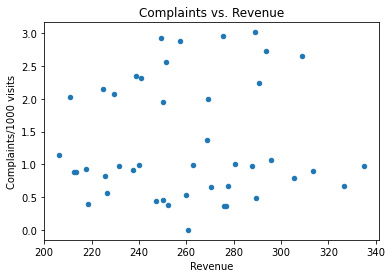

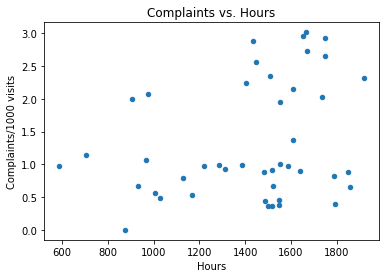

In [462]:
df.plot.scatter(x='Revenue', y='Complaints/1000 visits', title='Complaints vs. Revenue');
df.plot.scatter(x='Hours', y='Complaints/1000 visits', title='Complaints vs. Hours');